# MỤC LỤC 
* [1. Giới thiệu](#gioithieu)
* [2. Import các thư viện cần thiết:](#import)
* [3. Đọc dữ liệu](#docdulieu)
* [4. Tiến hành phân tích](#phantich)
    * [4.1. Thống kê số lượng sách phát hành, tổng số lượng bán ra, tổng số đánh giá nhận được và điểm đánh giá trung bình của mỗi Nhà xuất bản](#phan1)
        * [4.1.1. Lấy ra 10 Nhà xuất bản phát hành nhiều sách nhất](#phan1a)
        * [4.1.2. Lấy ra 10 Nhà xuất bản bán chạy nhất](#phan1b)
    * [4.2. Phân tích hiệu suất của các Nhà xuất bản](#phan2)
    * [4.3. Tìm ra thế mạnh về thể loại của các Nhà xuất bản](#phan3)
    * [4.4. Phân tích các Nhà xuất bản có tiềm năng nhưng hiệu suất còn thấp](#phan4)
        * [4.4.1. Lọc ra các Nhà xuất bản có hiệu suất thấp](#phan4a)
        * [4.4.2. Lọc ra các Nhà xuất bản có tiềm năng](#phan4b)
        * [4.4.3. Kết hợp hai yếu tố để tìm ra những Nhà xuất bản tiềm năng nhưng hiệu suất thấp](#phan4c)
* [5. Kết luận](#ketluan)
    * [5.1. Kết luận chung về đặc điểm và độ phổ biến của các Nhà xuất bản](#phan5a)
    * [5.2. Lợi ích đạt được từ kết quả phân tích với góc nhìn của Tiki, Nhà xuất bản, và độc giả](#phan5b)
    * [5.3. Kết luận tổng thể](#phan5c)

## 1. GIỚI THIỆU: 
<a id="gioithieu"></a>
**Câu hỏi:** Độ phổ biến và đặc điểm của các Nhà xuất bản trên nền tảng Tiki như thế nào? 

**Lợi ích:**
- Từ góc nhìn của Tiki: hiểu rõ mức độ yêu thích của nhà xuất bản và phát hiện được xu hướng thị trường để từ đó tập trung hợp tác với các Nhà xuất bản có tiềm năng, tối ưu chiến lược nhập hàng
- Từ góc nhìn của người đọc: hiểu được đặc điểm của những Nhà xuất bản để yên tâm khi mua sắm và tiết kiệm thời gian chọn sách, biết được những Nhà xuất bản có chất lượng cao, khám phá được những Nhà xuất bản sách phù hợp với sở thích cá nhân.

**Cách thực hiện:**
- Nhóm dữ liệu theo số lượng sách mỗi Nhà xuất bản phát hành.
- Tính các chỉ số bổ sung như tổng số lượng sách bán ra, điểm đánh giá trung bình, tổng lượt đánh giá của mỗi Nhà xuất bản.
- Phân tích sự khác biệt về độ phổ biến giữa các Nhà xuất bản dựa vào các chỉ số bổ sung để có được cái nhìn tổng quan về nhiều yếu tố.
- Tìm ra thế mạnh về thể loại của mỗi Nhà xuất bản để giúp Tiki và Nhà xuất bản hiểu rõ hơn về thế mạnh của mình trong từng thể loại sách, từ đó tối ưu hóa chiến lược quảng bá và phát hành sách.
- Phân tích các Nhà xuất bản có tiềm năng nhưng hiệu suất còn thấp để từ đó để xuất những cải thiện để tận dụng hết tiềm năng của những Nhà xuất bản này.


## 2. IMPORT CÁC THƯ VIỆN CẦN THIẾT:
<a id="import"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns

## 3. ĐỌC DỮ LIỆU:
<a id="docdulieu"></a>

In [2]:
# Đọc dữ liệu và in ra 5 hàng đầu tiên
df = pd.read_csv('../dataset/book_data_cleaned.csv')
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
1,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
2,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
3,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội
4,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn


## 4. TIẾN HÀNH PHÂN TÍCH: 
<a id="phantich"></a>

In [3]:
print(f'Số hàng thiếu giá trị của cột manufacturer là: {df.manufacturer.isnull().sum()}.')

Số hàng thiếu giá trị của cột manufacturer là: 0.


In [4]:
print(f'Số các giá trị khác nhau của cột manufacturer là: {df.manufacturer.nunique()}.')

Số các giá trị khác nhau của cột manufacturer là: 39.


### 4.1. Thống kê số lượng sách phát hành, tổng số lượng bán ra, tổng số đánh giá nhận được và điểm đánh giá trung bình của mỗi Nhà xuất bản:
<a id="phan1"></a>
- Tạo một ``DataFrame`` tổng hợp các thông tin về các Nhà xuất bản để thuận lợi cho quá trình phân tích.
  

In [5]:
publisher_statistic = df.groupby('manufacturer').agg({
    'product_id':'count',    # số lượng sách phát hành
    'quantity': 'sum',       # số lượng bán ra
    'n_review': 'sum',       # số đánh giá nhận được
    'avg_rating': 'mean'     # điểm đánh giá trung bình
}).rename(columns={'product_id': 'total_publish', 'quantity': 'total_sale', 'n_review': 'total_reviews',})

publisher_statistic

,total_publish,total_sale,total_reviews,avg_rating
manufacturer,,,,
Forbes Việt Nam,2,52,4,2.500000
Không rõ,264,1627952,155296,4.686742
NXB Trẻ,143,127336,20106,4.818881
NXB Đại học Kinh Tế Quốc Dân,3,6397,726,3.166667
Nhiều Nhà Xuất Bản,6,5076,835,4.166667
Nhà Xuất Bản Chính Trị Quốc Gia Sự Thật,4,2165,271,2.325000
Nhà Xuất Bản Compass Publishing,1,791,213,4.600000
Nhà Xuất Bản Công Thương,46,75702,9853,4.519565
Nhà Xuất Bản Dân Trí,132,188502,26488,4.509848


- Ta có ``publisher_statistic`` là DataFrame mới chứa thông tin tổng hợp về từng *Nhà xuất bản*, trong đó các cột:
  + ``total_publish``: số sách mỗi Nhà xuất bản đã phát hành.
  + ``total_sale``: số sách đã bán của mỗi Nhà xuất bản.
  + ``total_reviews``: tổng số lượt đánh giá mà Nhà xuất bản nhận được.
  + ``avg_rating``: điểm đánh giá trung bình của Nhà xuất bản. 

**Nhận xét tổng quan về DataFrame**:
- *Không rõ* là giá trị được điền để thay thế các ô dữ liệu bị thiếu trong DataFrame ban đầu.
  + Việc điền giá trị *Không rõ* này khiến những dòng không có Nhà xuất bản cụ thể được gom thành một nhóm.
  + Tuy nhiên điều này dẫn đến các số liệu tổng hợp cho nhóm này trở nên lớn bất thường.
  + Nhưng vì số lượng bản ghi bị thiếu giá trị nhiều, nên ta không bỏ qua các hàng này mà vẫn giữ nguyên để phân tích.
- Dữ liệu giúp đem lại cái nhìn tổng quan tốt về các Nhà xuất bản.
- Tiếp tục phân tích sâu hơn để xác định rõ các yếu tố như hiệu suất, chất lượng của mỗi Nhà xuất bản.

#### 4.1.1. Lấy ra 10 Nhà xuất bản phát hành nhiều sách nhất: 
<a id="phan1a"></a>
- **Mục đích**: dựa vào tiêu chí *số lượng sách phát hành* để tập trung phân tích các Nhà xuất bản có vai trò lớn trong ngành xuất bản.
- **Lợi ích**: có thể phân tích chi tiết về thị phần trong xuất bản, xác định được các Nhà xuất bản có tầm ảnh hưởng lớn trong ngành. Ngoài ra có thể đánh giá được sự đa dạng và mức độ cạnh tranh trong ngành xuất bản.

In [6]:
# Sắp xếp giảm dần số lượng sách phát hành để lấy ra 10 Nhà xuất bản phát hành nhiều sách nhất
top_10_publishers = publisher_statistic.sort_values('total_publish', ascending=False).head(10).reset_index()
top_10_publishers

,manufacturer,total_publish,total_sale,total_reviews,avg_rating
0,Không rõ,264,1627952,155296,4.686742
1,Nhà Xuất Bản Thế Giới,246,644827,96555,4.498374
2,NXB Trẻ,143,127336,20106,4.818881
3,Nhà Xuất Bản Dân Trí,132,188502,26488,4.509848
4,Nhà Xuất Bản Hà Nội,128,153542,28237,4.696094
5,Nhà Xuất Bản Kim Đồng,113,55889,9339,4.742478
6,Nhà Xuất Bản Hội Nhà Văn,111,238437,43045,4.488288
7,Nhà Xuất Bản Thanh Niên,97,178779,33929,4.640206
8,Nhà Xuất Bản Tổng hợp TP.HCM,91,298992,43431,4.612088
9,Nhà Xuất Bản Lao Động,89,129530,18488,4.714607


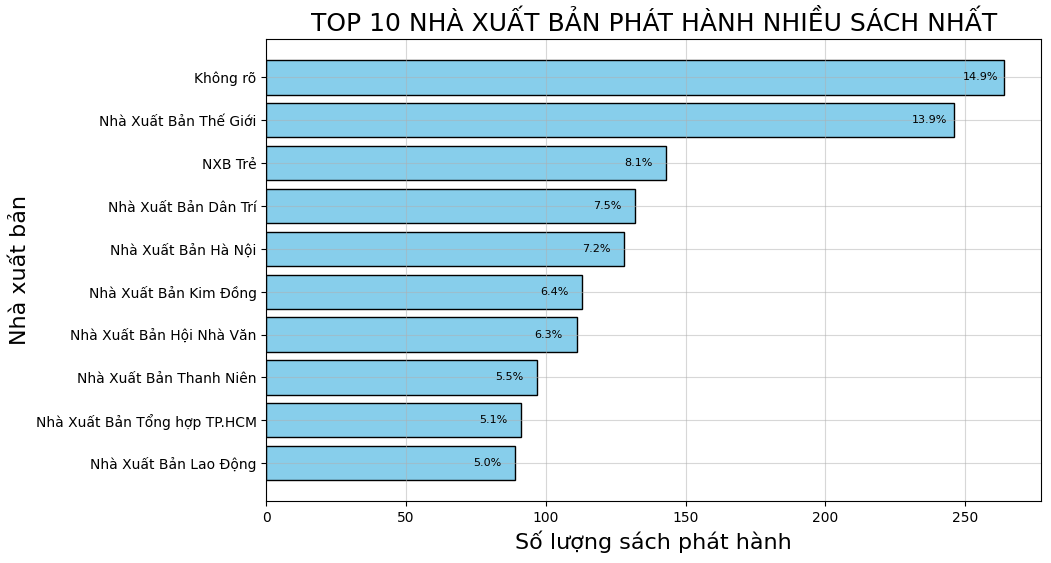

In [7]:
# Tổng số lượng sách trên nền tảng Tiki
total_book = df.shape[0]
# Tính toán tỷ lệ đóng góp của mỗi Nhà xuất bản vào tổng số lượng sách có mặt trên Tiki
publish_contribution= [publish*100/total_book for publish in top_10_publishers['total_publish']]
# Trực quan bằng biểu đồ cột ngang
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_publishers['manufacturer'], top_10_publishers['total_publish'], color='skyblue', edgecolor='black')
# Gắn nhãn tỷ lệ phần trăm đóng góp lên cột
for bar, percent in zip(bars, publish_contribution):
    plt.text(bar.get_width() + -15, 
             bar.get_y() + bar.get_height()/2,
             f'{percent:.1f}%',
             va='center',
             fontsize=8)
plt.title('TOP 10 NHÀ XUẤT BẢN PHÁT HÀNH NHIỀU SÁCH NHẤT', fontsize=18)
plt.xlabel('Số lượng sách phát hành', fontsize=16)
plt.ylabel('Nhà xuất bản', fontsize=16)
plt.gca().invert_yaxis()
plt.grid(alpha=0.5)
plt.show()

**Lý do chọn biểu đồ**:
- Biểu đồ cột ngang phù hợp khi so sánh số liệu giữa các Nhà xuất bản với nhau.
- Cột ngang giúp dễ dàng đọc các nhãn vì tên các Nhà xuất bản khá dài.
- Kết hợp với tỷ lệ phần trăm đóng của góp của từng Nhà xuất bản vào tổng số sách có mặt trên nền tảng Tiki, giúp dễ nhận diện các Nhà xuất bản chiếm ưu thế.
 
**Nhận xét chung**:
- **Các Nhà xuất bản lớn**:
    + *Không rõ*: chiếm tỷ lệ lớn nhất, là các sách chưa xác định được Nhà xuất bản rõ ràng.
    + *Nhà Xuất Bản Thế Giới*: đứng thứ hai với tỷ lệ 13.9% tương đương với gần 250 đầu sách có mặt trên nền tảng Tiki, là Nhà xuất bản có đóng góp đáng kể vào số lượng sách trên Tiki.
    + *NXB Trẻ*: xếp thứ ba, chiếm 8.1% và *Nhà Xuất Bản Dân Trí* xếp thứ tư với 7.5%. Tuy có khoảng cách khá lớn giữa vị trí thứ hai và thứ ba tuy nhiên đây đều là các Nhà xuất bản mạnh trong việc phát hành sách trên nền tảng Tiki, với số lượng 130 đầu sách.
- **Các Nhà xuất bản nhỏ hơn**:
    + Các Nhà xuất bản như *Nhà Xuất Bản Hà Nội, Nhà Xuất Bản Kim Đồng, Nhà Xuất Bản Hội Nhà Văn,...* có tỷ lệ đóng góp trong khoảng 5 đến 7%, tương đương 89 đến 128 đầu sách.
    + Các Nhà xuất bản này vẫn đóng góp vào một phần không nhỏ trong tổng số sách trên nền tảng Tiki.

**Kết luận**:
- Sự phân bố không đồng đều: có sự chênh lệch rõ ràng giữa những Nhà xuất bản đứng đầu và các Nhà xuất bản còn lại. Điều này cho thấy *sự không đồng đều* trong đóng góp của các Nhà xuất bản trên nền tảng Tiki.
- Phân loại rõ những Nhà xuất bản chiếm ưu thế như *Nhà Xuất Bản Thế Giới*, cho thấy xu hướng phát hành sách rộng rãi của các Nhà xuất bản lớn.
- Mặc dù các Nhà xuất bản khác có tỷ lệ phát hành ít hơn nhưng sự tồn tại của họ vẫn đóng góp một phần quan trọng trong tổng số sách trên Tiki.
- Cho thấy *sự đa dạng* của thị trường sách với nhiều Nhà xuất bản từ các lĩnh vực khác nhau tham gia vào nền tảng Tiki. 

#### 4.1.2. Lấy ra 10 Nhà xuất bản bán chạy nhất:
<a id="phan1b"></a>
- **Mục đích**: dựa vào tiêu chí *số lượng sách bán được* để tập trung phân tích hiệu suất kinh doanh của các Nhà xuất bản trên nền tảng Tiki.
- **Lợi ích**: xác định được những Nhà xuất bản có hiệu suất kinh doanh tốt, tức là có số lượng sách bán ra lớn nhất. Ngoài ra giúp ta hiểu rõ hơn về thị trường sách và xu hướng tiêu dùng trên nền tảng Tiki.

In [8]:
# Sắp xếp giảm dần số lượng sách bán được và lấy ra 10 Nhà xuất bản bán chạy nhất
top_10_sales = publisher_statistic.sort_values('total_sale', ascending=False).head(10).reset_index()
top_10_sales

,manufacturer,total_publish,total_sale,total_reviews,avg_rating
0,Không rõ,264,1627952,155296,4.686742
1,Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM,3,672029,2019,4.800000
2,Nhà Xuất Bản Thế Giới,246,644827,96555,4.498374
3,Nhà Xuất Bản Tổng hợp TP.HCM,91,298992,43431,4.612088
4,Nhà Xuất Bản Hội Nhà Văn,111,238437,43045,4.488288
5,Nhà Xuất Bản Dân Trí,132,188502,26488,4.509848
6,Nhà Xuất Bản Thanh Niên,97,178779,33929,4.640206
7,Nhà Xuất Bản Hà Nội,128,153542,28237,4.696094
8,Nhà Xuất Bản Văn Học,77,138604,21958,4.687013
9,Nhà Xuất Bản Lao Động,89,129530,18488,4.714607


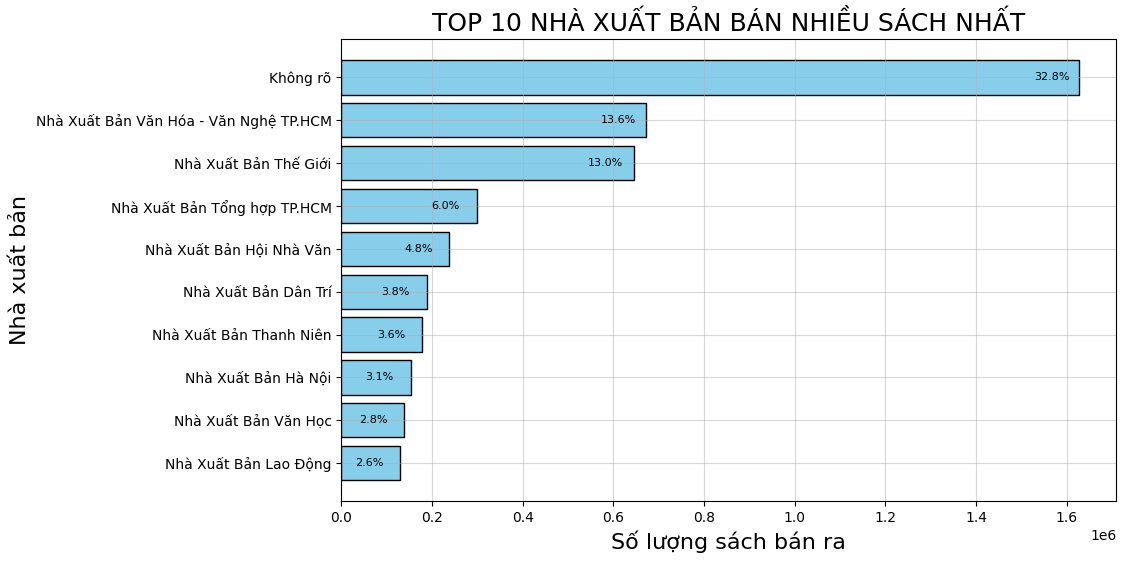

In [9]:
# Tổng số lượng sách bán được trên nền tảng Tiki
total_sales = publisher_statistic['total_sale'].sum()
# Tính toán tỷ lệ đóng của mỗi Nhà xuất bản vào tổng số lượng sách bán ra trên Tiki
sale_contribution = [sale*100/total_sales for sale in top_10_sales['total_sale']]
#Trực quan hóa bằng biểu đồ cột ngang
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_sales['manufacturer'], top_10_sales['total_sale'], color='skyblue', edgecolor='black')
# Gắn nhãn tỷ lệ phần trăm đóng góp lên cột
for bar, percent in zip(bars, sale_contribution):
    plt.text(bar.get_width() - 1e5, 
             bar.get_y() + bar.get_height()/2,
             f'{percent:.1f}%',
             va='center',
             fontsize=8)
plt.title('TOP 10 NHÀ XUẤT BẢN BÁN NHIỀU SÁCH NHẤT', fontsize=18)
plt.xlabel('Số lượng sách bán ra', fontsize=16)
plt.ylabel('Nhà xuất bản', fontsize=16)
plt.gca().invert_yaxis()
plt.grid(alpha=0.5)
plt.show()

**Lý do chọn biểu đồ**:
- Biểu đồ cột ngang phù hợp khi so sánh số liệu giữa các Nhà xuất bản với nhau.
- Cột ngang giúp dễ dàng đọc các nhãn vì tên các Nhà xuất bản khá dài.
- Kết hợp với tỷ lệ phần trăm đóng của góp của từng Nhà xuất bản vào tổng số sách bán được trên nền tảng Tiki, giúp dễ nhận diện các Nhà xuất bản có số lượng sách bán ra cao nhất.
 
**Nhận xét chung**:
- **Các Nhà xuất bản bán được nhiều sách**:
    + *Không rõ*: chiếm tỷ lệ lớn nhất với 32.8% tổng số sách bán ra tương đương hơn 1.600.000 cuốn sách được bán ra mà không có thông tin rõ ràng về nhà xuất bản.
    + Các nhà xuất bản như *Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM* (chiếm 13.6%) và *Nhà Xuất Bản Thế Giới* (chiếm 13%) có số sách bán ra trong khoảng 600.000 cuốn sách, cho thấy họ đóng góp phần lớn vào tổng số lượng sách bán ra, cũng có thể chỉ ra rằng họ có chiến lược xuất bản hiệu quả và các sách của họ được tiêu thụ mạnh mẽ.
- **Các Nhà xuất bản có số lượng sách bán ra ít hơn**:
    + Các Nhà xuất bản như *Nhà Xuất Bản Tổng Hợp TP.HCM, Nhà Xuất Bản Hội Nhà Văn, Nhà Xuất Bản Dân Trí,...* có số lượng sách bán ra chiếm tỷ lệ dưới 6%, tương đương với mức dưới 300.000 cuốn.

**Kết luận**:
- Sự phân bố không đồng đều: các Nhà xuất bản đứng thứ hai và thứ 3 có số lượng sách bán ra gần gấp đôi so với các Nhà xuất bản ở hạng thứ tư, là một sự chênh lệch rõ ràng. Điều này cho thấy *sự không đồng đều* trong số lượng sách bán ra của các Nhà xuất bản trên nền tảng Tiki.
- Những nhà xuất bản như *Nhà Xuất Bản Văn Học* và *Nhà Xuất Bản Lao Động* có tỷ lệ rất thấp, chỉ chiếm khoảng 2.6% và 2.8%. Điều này cho thấy rằng dù các nhà xuất bản này có mặt trong top 10, nhưng sự đóng góp của họ vào tổng số sách bán ra không đáng kể so với các nhà xuất bản đứng đầu.
- Các nhà xuất bản khác có số lượng sách bán ra ít hơn nhưng vẫn đóng góp đáng kể vào tổng số sách bán ra. Những nhà xuất bản này cần nghiên cứu thêm về nhu cầu thị trường và xây dựng chiến lược xuất bản phù hợp hơn để nâng cao thị phần.

### 4.2. Phân tích hiệu suất của các Nhà xuất bản: 
<a id="phan2"></a>
- **Cách thực hiện**: tạo một cột mới có tên ``efficiency`` để tính hiệu suất bằng tỷ lệ phần trăm số lượng sách bán được ``total_sale`` so với số lượng sách phát hành ``total_publish``.
- **Mục đích**: dựa vào tiêu chí *hiệu suất* để tập trung phân tích mức độ hiệu quả của các Nhà xuất bản trong việc biến số lượng sách phát hành thành doanh số bán hàng.
- **Lợi ích**: xác định được những Nhà xuất bản tiềm năng, đồng thời biết được những Nhà xuất bản có hiệu suất cần cải thiện danh mục sách hoặc chiến lược kinh doanh. Ngoài ra, Tiki có thể dựa vào hiệu suất của Nhà xuất bản để tối ưu hóa danh mục sách, tăng cười hợp tác với những Nhà xuất bản hiệu quả và hỗ trợ cải thiện hiệu suất cho những Nhà xuất bản chưa đạt được mục tiêu.

In [10]:
# Định dạng hiển thị 2 chữ số thập phân 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Tính hiệu suất bán hàng
publisher_statistic['efficiency'] = (publisher_statistic['total_sale'] / publisher_statistic['total_publish']) * 100
# Sắp xếp theo hiệu suất từ cao xuống thấp
sorted_efficiency = publisher_statistic.sort_values('efficiency', ascending=False)
sorted_efficiency

,total_publish,total_sale,total_reviews,avg_rating,efficiency
manufacturer,,,,,
Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM,3,672029,2019,4.80,22400966.67
Không rõ,264,1627952,155296,4.69,616648.48
Nhà Xuất Bản Đại Học Kinh Tế Quốc Dân,2,10363,2216,4.90,518150.00
Nhà Xuất Bản Hồng Đức - Hội Luật Gia Việt Nam,1,5160,767,4.80,516000.00
Nhà Xuất Bản Đà Nẵng,17,71132,11028,4.62,418423.53
Nhà Xuất Bản Tổng hợp TP.HCM,91,298992,43431,4.61,328562.64
Nhà Xuất Bản Phụ Nữ,30,91602,14566,4.59,305340.00
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,14,39404,8011,4.52,281457.14
Nhà Xuất Bản Thế Giới,246,644827,96555,4.50,262124.80


**Nhận xét chung**:
- Hiệu suất của Nhà xuất bản được đo bằng tỷ lệ *số lượng sách bán ra/số lượng sách phát hành*, hay nói cách khác là trung bình mỗi cuốn sách phát hành sẽ mang lại bao nhiêu sách được bán ra. Dựa vào bảng dữ liệu, ta thấy:
  + Hiệu suất có sự chênh lệch rất lớn giữa những Nhà xuất bản: hiệu suất cao nhất đạt hơn 22.000.000% (tức là số sách bán ra gấp 200.000 lần số sách phát hành), trong khi đó hiệu suất thấp nhất là 2.600%, tức là chênh lệch nhau 10.000 lần.
  + Một số Nhà xuất bản có hiệu suất cao không nhất thiết phải có số lượng phát hành lớn, mà phụ thuộc vào mức độ hấp dẫn và khả năng tiêu thụ của sách.
  + Các Nhà xuất bản có hiệu suất thấp thường có số lượng phát hành nhỏ và sách không được tiêu thụ nhiều.
- Nhóm các Nhà xuất bản có hiệu suất cao: *Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM, Nhà Xuất Bản Đại Học Kinh Tế Quốc Dân và Nhà Xuất Bản Hồng Đức - Hội Luật Gia Việt Nam* có hiệu suất dẫn đầu, đây cũng là những Nhà xuất bản tập trung vào một nội dung chuyên biệt, tập trung vào một tập khách hàng cụ thể.
- Nhóm các Nhà xuất bản có hiệu suất trung bình: *Nhà Xuất Bản Tổng hợp TP.HCM, Nhà Xuất Bản Phụ Nữ, Nhà Xuất Bản Thế Giới, Nhà Xuất Bản Kim Đồng, Nhà Xuất Bản Văn Học, và Nhà Xuất Bản Lao Động* có số lượng sách phát hành ở mức trên dưới 50 đầu sách, số lượng bán ra cao nhưng hiệu suất giảm so với nhóm đầu vì số lượng đầu sách phát hành nhiều. Ngoài ra, một phần vì các Nhà xuất bản này chỉ tập trung vào các mảng sách phổ thông, có sức tiêu thụ ổn định nhưng không quá nổi bật.
- Nhóm các Nhà xuất bản có hiệu suất thấp: *Nhà Xuất Bản Khoa Học Xã Hội, Nhà Xuất Bản Tài Chính, Nhà Xuất Bản Thông Tin Và Truyền Thông, và Forbes Việt Nam* có số lượng đầu sách phát hành nhỏ, số lượng bán ra ít. Điều này có thể lý giải lo do không được ưa chuộng hoặc do phân khúc quá hẹp.

**Kết luận**:
- Chất lương và tính tập trung sẽ quyết định hiệu suất: ta thấy nhóm các Nhà xuất bản có hiệu suát cao chủ yếu tập trung vào nội dung, thể loại cụ thể hoặc chú trọng đến chất lượng, phù hợp với thị hiếu sẽ mang lại hiệu quả cao.
- Quy mô không đồng nghĩa với hiệu suất: một số Nhà xuất bản có số lượng sách phát hành cao nhưng hiệu suất không quá vượt trội.
- Vai trò của phân khúc và thương hiệu: ta thấy có những Nhà xuất bản có thương hiệu mạnh hoặc tập trung vào một nội dung chuyên biệt sẽ có được hiệu suất bán hàng tốt.
- Nhóm hiệu suất thấp cần cải thiện chiến lược: xem xét lại danh mục sách, phân khúc bán hàng hoặc tập trung vào chiến lược phana phối để tăng hiệu quả bán hàng. 

**Trực quan 10 Nhà xuất bản có số lượng sách bán ra nhiều nhất:**
- Ta tiếp tục tập trung vào yếu tố ``efficiency`` của 10 Nhà xuất bản bán chạy nhất để phân tích sâu về mối tương quan giữa số lượng sách phát hành, số lượng sách bán ra và điểm trung bình đánh giá các sách của Nhà xuất bản.

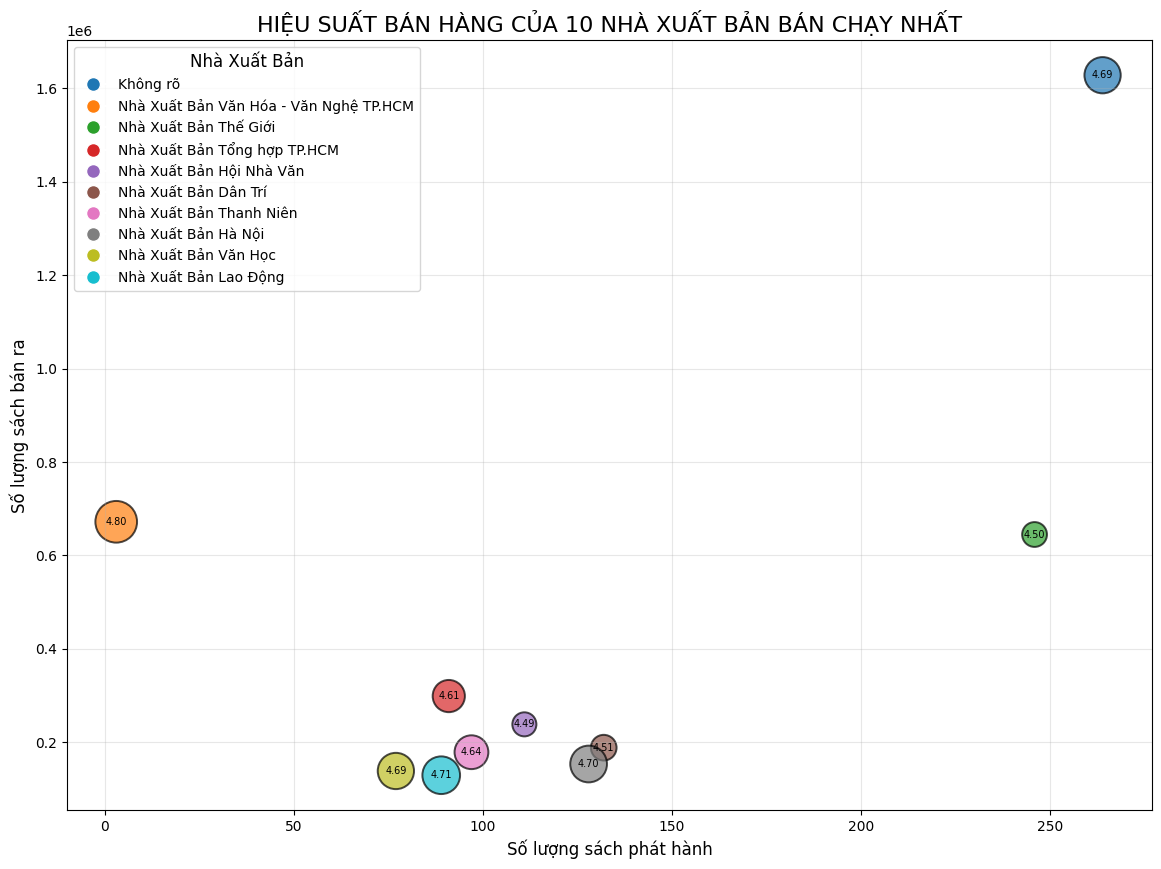

In [11]:
# Trực quan bằng biểu đồ
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='total_publish',   
    y='total_sale',       
    size='avg_rating',    
    hue='manufacturer',   
    data=top_10_sales,    
    sizes=(300, 900),      
    palette='tab10',     
    edgecolor='black',
    alpha=0.7,
    marker='o')
# Gắn nhãn điểm trung bình đánh giá 
for i in range(len(top_10_sales)):
    plt.text(
        top_10_sales['total_publish'].iloc[i],    
        top_10_sales['total_sale'].iloc[i],    
        f"{top_10_sales['avg_rating'].iloc[i]:.2f}",  
        ha='center',        
        va='center',          
        fontsize=7,          
        color='black')

# Tạo bảng chú thích legend
unique_publishers = top_10_sales['manufacturer'].unique()
handles = []
for i, publisher in enumerate(unique_publishers):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor=sns.color_palette('tab10')[i], 
                               markersize=10, label=publisher))
    
plt.legend(handles=handles, title='Nhà Xuất Bản', fontsize=10, title_fontsize=12, loc='best')
plt.title('HIỆU SUẤT BÁN HÀNG CỦA 10 NHÀ XUẤT BẢN BÁN CHẠY NHẤT', fontsize=16)
plt.xlabel('Số lượng sách phát hành', fontsize=12)
plt.ylabel('Số lượng sách bán ra', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Lý do chọn biểu đồ**:
- Biểu đồ bong bóng với  trục x là số lượng sách phát hành, trục y là số lượng sách bán ra vàkích thước bong bóng thể hiện điểm đánh giá trung bình của mỗi Nhà xuất bản.
- Biểu đồ kết hợp đồng thời những thông tin quan trọng như năng lực sản xuất của Nhà xuất bản, khả năng tiêu thụ sản phẩm đồng thời phản ánh chất lượng hoặc mức độ hài lòng của người mua đối với sách của Nhà xuất bản.
- Mỗi bong bóng đại diện cho một trong 10 Nhà xuất bản bán chạy nhất, dễ dàng so sánh hiệu suất giữa các Nhà xuất bản dựa trên vị trí và kích thước của bong bóng.

**Nhận xét chung**:
- *Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM* có số lượng sách phát hành rất ít, chỉ phát hành 3 cuốn sách nhưng số lượng bán ra hơn 600.000 quyển và có điểm đánh giá cao nhất trong top 10 Nhà xuất bản bán chạy (4.8 điểm). Cho thấy những đầu sách mà Nhà xuất bản này phát hành rất được ưa chuộng, chất lượng sách tốt và chiến lược phân phối hiệu quả nên có hiệu suất rất tốt.
- *Nhà Xuất Bản Thế Giới*: có số lượng sách phát hành ở cao (246 đầu sách) với số lượng bán ra gần 650.000 quyển và điểm đánh giá ở mức tương đối tốt (4.5 điểm) cho thấy hiệu suất của Nhà sản xuất này cũng rất tốt.
- Các Nhà xuất bản khác có số lượng sách phát hành và số lượng sách bán ra ở mức tương đối, điểm trung bình cũng dao động ở mức 4.5 đến 4.7 cho người mua hài lòng với các đầu sách từ những Nhà xuất bản này, tuy nhiên mức dộ dài lòng vẫn thấp hơn các Nhà xuất bản dẫn đầu.

**Kết luận**:
- Biểu đồ bong bóng đã chỉ ra mối tương quan giữa số lượng sách phát hành, sách bán ra và chất lượng sách thông qua điểm đánh giá. 
- Hiệu suất bán hàng không chỉ phụ thuộc vào số lượng sách phát hành: điển hình là *Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM* có số lượng sách phát hành rất ít nhưng lại có số lượng sách bán ra rất cao, chứng tỏ Nhà xuất bản này có chiến lược phát hành chọn lọc và phù hợp với thị trường. Điều này còn cho thấy tầm quan trọng trong việc hiểu nhu cầu thị trường hơn là tập trung vào số lượng.
- Chất lượng ảnh hưởng đến kết quả bán hàng: ta thấy những Nhà xuất bản nằm trong top 10 Nhà xuất bản bán chạy nhất đều có điểm đánh giá rất cao (từ 4.5 trở lên). Điều này phản ánh sự ưu tiên của khách hàng đối với những sách có chất lượng cao.
- Việc phát hành nhiều sách không đồng nghĩa với số lượng sách bán ra sẽ cao: ta thấy phần lớn các Nhà xuất bản trên biểu đồ đều phát hành từ 80 đến 150 đầu sách nhưng số lượng bán ra cũng chỉ ở mức 200.000 đến 300.000 quyển, khoogn đạt được mức bán ra cao như những Nhà xuất bản dẫn đầu. Điều này cho thấy các Nhà xuất bản này nên cân nhắc lại về các yếu tố như chất lượng sách hoặc thị hiếu người mua để tập trung phát hành những sách đem lại hiệu suất cao.
- Từ đó ta thấy để đạt hiệu suất bán hàng tốt, các nhà xuất bản không chỉ cần phát hành nhiều sách mà còn cần chú trọng đến chất lượng và chiến lược phân phối phù hợp. Từ đây, các nhà xuất bản và nền tảng Tiki có thể đưa ra các chiến lược hợp tác hoặc cải thiện hiệu quả kinh doanh.

### 4.3. Tìm ra thế mạnh về thể loại của các Nhà xuất bản:
<a id="phan3"></a>
- **Cách thực hiện**: xác định số lượng sách phát hành theo thể loại của từng Nhà xuất bản và tìm ra thể loại có số lượng phát hành nhiều nhất của mỗi Nhà xuất bản, việc tìm ra thể loại nổi bật cho thấy Nhà xuất bản có chú trọng đầu tư vào việc phát hành các sách thuộc thể loại này.
- **Mục đích**: xác định thế mạnh của Nhà xuất bản trong từng thể loại sách, từ đó đưa ra các chiến lược để cải thiện hoặc tăng cường phát hành trong các thể loại nổi bật của Nhà xuất bản.
- **Lợi ích**: Tiki có thể dựa trên kết quả này để hiểu rõ điểm mạnh của từng Nhà xuất bản và từ đó đưa ra các chiến lược quảng bá sản phẩm hiệu quả hơn. Ngoài ra các Nhà xuất bản có thể sử dụng phân tích này để nhận biết thể loại sách nào đang được yêu thích nhất và tập trung vào việc phát triển thể loại đó. Họ có thể đầu tư thêm vào việc xuất bản và quảng bá các sách thuộc thể loại mạnh, trong khi cũng cố gắng cải thiện các thể loại khác nếu cần thiết.


In [12]:
# Nhóm dữ liệu theo Nhà xuất bản và thể loại, đếm số lượng sách phát hành theo thể loại
publisher_category_count = df.groupby(['manufacturer', 'category']).size().reset_index(name='book_count')
# Tìm ra thể loại có số lượng sách phát hành nhiều nhất cho từng Nhà xuất bản
max_category = publisher_category_count.loc[publisher_category_count.groupby('manufacturer')['book_count'].idxmax()]
max_category

,manufacturer,category,book_count
0,Forbes Việt Nam,Khác,2
31,Không rõ,Tiểu Thuyết,50
47,NXB Trẻ,Khác,62
72,NXB Đại học Kinh Tế Quốc Dân,Sách tư duy - Kỹ năng sống,2
73,Nhiều Nhà Xuất Bản,Khác,2
78,Nhà Xuất Bản Chính Trị Quốc Gia Sự Thật,Luật - Văn Bản Luật,3
79,Nhà Xuất Bản Compass Publishing,Sách Học Tiếng Anh,1
92,Nhà Xuất Bản Công Thương,Sách tư duy - Kỹ năng sống,11
117,Nhà Xuất Bản Dân Trí,Sách tư duy - Kỹ năng sống,17
130,Nhà Xuất Bản Giáo Dục Việt Nam,Du ký,1


In [13]:
# Nhóm dữ liệu theo thể loại 
category_group = max_category.groupby('category')

# In từng thể loại, cùng danh sách các nhà xuất bản và số lượng sách phát hành
for category, group in category_group:
    print(f"Thể loại: {category}")
    print(group[['manufacturer', 'book_count']].to_string(index=False))
    print("-" * 60)  # Đường phân cách giữa các thể loại

Thể loại: Du ký
                  manufacturer  book_count
Nhà Xuất Bản Giáo Dục Việt Nam           1
------------------------------------------------------------
Thể loại: Giáo Trình Đại Học - Cao Đẳng
              manufacturer  book_count
Nhà Xuất Bản Kinh Tế TPHCM           1
------------------------------------------------------------
Thể loại: Khác
                          manufacturer  book_count
                       Forbes Việt Nam           2
                               NXB Trẻ          62
                    Nhiều Nhà Xuất Bản           2
                   Nhà Xuất Bản Hà Nội          19
                 Nhà Xuất Bản Hồng Đức          13
                 Nhà Xuất Bản Kim Đồng         102
Nhà Xuất Bản Thông Tin Và Truyền Thông           1
                Nhà Xuất Bản Thông Tấn           1
                 Nhà Xuất Bản Tôn Giáo           2
          Nhà Xuất Bản Văn Hoá Dân Tộc           1
------------------------------------------------------------
Thể loại: Luật - Văn 

**Nhận xét chung:**
- Thể loại *Khác* là thế mạnh của khá nhiều Nhà xuất bản như *Nhà Xuất Bản Kim Đồng* (102 cuốn), *NXB Trẻ* (62 cuốn),... cho thấy sự đa dạng trong nhiều thể loại và tập trung mạnh mẽ vào các thể loại phổ thông hoặc hướng tới độc giả trẻ, đặc biệt là sách thiếu nhi và truyện tranh.
- *Nhà Xuất Bản Thế Giới* dẫn đầu về thể loại *Sách tư duy - Kỹ năng sống* với 68 đầu sách, cho thấy đây là lĩnh vực chuyên môn, phù hợp với nhu cầu phát triển bản thân của độc giả hiện nay.
- Các Nhà xuất bản chuyên phát sách ở lĩnh vực chuyên biệt, nhắm tới một tệp khách hàng cụ thể, cho thấy sự chuyên sâu trong mảng sách học thuật, chuyên ngành của những Nhà xuất bản này:
    + *Nhà Xuất Bản Compass Publishing* và *Nhà Xuất Bản Thời Đại* chỉ có 1 cuốn trong thể loại *Sách Học Tiếng Anh*.
    + *Nhà Xuất Bản Giáo Dục Việt Nam* với 1 cuốn thuộc thể loại *Du Ký*.
    + *Nhà Xuất Bản Khoa học & kỹ thuật* với 1 đầu sách thuộc thể loại *Sách Marketing - Bán hàng*.
    + *Nhà Xuất Bản Kinh Tế TP.HCM* với 1 đầu sách thuộc thể loại *Giáo Trình Đại Học - Cao Đẳng*.
    + *Nhà Xuất Bản Tài Chính* với 3 đầu sách thuộc thể loại *Sách tài chính, tiền tệ*.
    + *Nhà Xuất Bản Khoa Học Xã Hội* và *Nhà Xuất Bản Tri Thức* với 3 đầu sách thuộc thể loại *Lịch sử thế giới*.
- *Nhà Xuất Bản Hội Nhà Văn* và *Nhà Xuất Bản Văn Học* chuyên sâu trong mảng *Tiểu thuyết*, tập trung vào văn học đại chúng.
- *Nhà Xuất Bản Thế Giới* đứng đầu trong mảng *Sách tư duy - Kỹ năng sống* với 68 đầu sách, tập trung vào phát triển cá nhân.
- *Nhà Xuất Bản Phụ Nữ* phát hành 10 cuốn sách thuộc thể loại *Truyện ngắn - Tản văn - Tạp văn*, các đầu sách thuộc các Nhà xuất bản này phù hợp với xu hướng đọc sách giải trí nhẹ nhàng của người trẻ tuổi.

**Kết luận:**
- Ta thấy sự phân hóa rõ ràng giữa Nhà xuất bản đa ngành và chuyên ngành, giúp độc giả dễ dàng xác định nguồn sách phù hợp.
- Các Nhà xuất bản lớn như *Nhà Xuất Bản Kim Đồng, NXB Trẻ, và Nhà Xuất Bản Hội Nhà Văn* nên tiếp tục đầu tư vào các thể loại phổ biến mà họ đang dẫn đầu, tăng cường hoạt động quảng bá và hợp tác để duy trì thị phần.
- Các Nhà xuất bản chuyên ngành có thể mở rộng sang lĩnh vực liên quan hoặc hợp tác với các Nhà xuất bản khác để tăng đầu sách phát hành.
- Tiki có thể dùng phân tích này để đề xuất các chiến dịch quảng bá tập trung cho từng Nhà xuất bản, đẩy mạnh thế mạnh riêng biệt của họ để giúp tăng doanh số.

### 4.4. Phân tích các Nhà xuất bản có tiềm năng nhưng hiệu suất còn thấp: 
<a id="phan4"></a>
- Dựa vào điểm đánh giá và hiệu suất bán hàng để tìm ra những Nhà xuất bản có tiềm năng nhưng hiệu suất còn thấp.
- Đưa ra những giải pháp để khai thác tiềm năng của những Nhà xuất bản này, giúp cải thiện hiệu quả kinh doanh của Nhà xuất bản cũng như Tiki.
- Đây là một cách để khai thác nguồn tài nguyên chưa được tận dụng hết, từ đó không chỉ giúp tăng trưởng doanh thu mà còn làm phong phú thêm trải nghiệm người đọc và củng cố vị thế của Tiki trong thị trường sách trực tuyến.

#### 4.4.1. Lọc ra các Nhà xuất bản có hiệu suất thấp: 
<a id="phan4a"></a>
- Mục đích để tìm ra những Nhà xuất bản hoạt động không hiệu quả so với mặt bằng chung.
- Dựa trên hiệu suất bán hàng của các Nhà xuất bản, ta lọc ra những Nhà xuất bản có hiệu suất ``efficiency`` thấp hơn giá trị trung vị của toàn bộ Nhà xuất bản trong tập dữ liệu.
- Ở đây ta dựa vào giá trị trung vị thay vì trung bình để giảm ảnh hưởng của các giá trị ngoại lệ, vì ở phần phân tích hiệu suất các Nhà xuất bản, ta thấy có sự chênh lệch rất lớn giữa những Nhà xuất bản đứng đầu và phần còn lại nên việc chọn giá trị trung vị trong trường hợp này sẽ phản ánh chính xác hơn.

In [14]:
# Lọc ra những Nhà xuất bản có hiệu suất thấp hơn trung vị
low_efficiency_publishers = publisher_statistic[publisher_statistic['efficiency'] < publisher_statistic['efficiency'].median()]
low_efficiency_publishers

,total_publish,total_sale,total_reviews,avg_rating,efficiency
manufacturer,,,,,
Forbes Việt Nam,2,52,4,2.50,2600.00
NXB Trẻ,143,127336,20106,4.82,89046.15
Nhiều Nhà Xuất Bản,6,5076,835,4.17,84600.00
Nhà Xuất Bản Chính Trị Quốc Gia Sự Thật,4,2165,271,2.33,54125.00
Nhà Xuất Bản Compass Publishing,1,791,213,4.60,79100.00
Nhà Xuất Bản Giáo Dục Việt Nam,1,32,1,5.00,3200.00
Nhà Xuất Bản Hà Nội,128,153542,28237,4.70,119954.69
Nhà Xuất Bản Hồng Đức,59,58238,6724,4.04,98708.47
Nhà Xuất Bản Khoa Học Xã Hội,5,1185,158,4.90,23700.00


#### 4.4.2. Lọc ra các Nhà xuất bản có tiềm năng: 
<a id="phan4b"></a>
- Mục đích để tìm ra những Nhà xuất bản có điểm đánh giá cao hơn trung bình các Nhà xuất bản trên nền tảng Tiki, thể hiện rằng sản phẩm của họ đáp ứng tốt nhu cầu của độc giả.
- Dựa trên điểm đánh giá của các Nhà xuất bản, ta lọc ra những Nhà xuất bản có điểm đánh giá ``avg_rating`` cao hơn giá trị trung bình của toàn bộ Nhà xuất bản trong tập dữ liệu.
- Kết hợp dựa vào số lượng đánh giá ``total_reviews``, ta lọc ra những Nhà xuất bản có số lượt đánh giá vượt trên ngưỡng trung bình tỷ lệ đánh giá so với tỷ lệ mua sách ``total_reviews/total_sale``. 

- Trước hết, ta tính toán phân phối của tỷ lệ ``total_reviews/total_sale`` để chọn ra một tỷ lệ phù hợp để làm ngưỡng.

In [15]:
# Tính tỷ lệ đánh giá/doanh số
publisher_statistic['review_to_sale_ratio'] = publisher_statistic['total_reviews'] / publisher_statistic['total_sale']
# Mô tả phân phối tỷ lệ này
distribution_statistic = publisher_statistic['review_to_sale_ratio'].describe()
distribution_statistic

count   39.00
mean     0.14
std      0.05
min      0.00
25%      0.11
50%      0.15
75%      0.18
max      0.27
Name: review_to_sale_ratio, dtype: float64

- Ta thấy trung bình của tỷ lệ này là 0.14, tức là trung bình 100 sách bán ra có sẽ 14 sách nhận được đánh giá.
- Ta thấy đây là một tỷ lệ phù hợp trong thương mại điện tử vì thực tế chỉ có một phần nhỏ người mua thực sự để lại đánh giá, ngoài ra ngưỡng này giúp loại bỏ các Nhà xuất bản có số lượt đánh giá quá ít, vốn không thể đại diện cho chất lượng thực sự của sách.

In [16]:
# Lọc ra những Nhà xuất bản có điểm đánh giá cao hơn trung bình 
potential_publishers = publisher_statistic[
    (publisher_statistic['avg_rating'] > publisher_statistic['avg_rating'].mean()) &
    (publisher_statistic['review_to_sale_ratio'] > distribution_statistic['mean'])
]
potential_publishers

,total_publish,total_sale,total_reviews,avg_rating,efficiency,review_to_sale_ratio
manufacturer,,,,,,
NXB Trẻ,143,127336,20106,4.82,89046.15,0.16
Nhà Xuất Bản Compass Publishing,1,791,213,4.60,79100.00,0.27
Nhà Xuất Bản Hà Nội,128,153542,28237,4.70,119954.69,0.18
Nhà Xuất Bản Hồng Đức - Hội Luật Gia Việt Nam,1,5160,767,4.80,516000.00,0.15
Nhà Xuất Bản Hội Nhà Văn,111,238437,43045,4.49,214808.11,0.18
Nhà Xuất Bản Kim Đồng,113,55889,9339,4.74,49459.29,0.17
Nhà Xuất Bản Kinh Tế TPHCM,3,5896,1128,4.87,196533.33,0.19
Nhà Xuất Bản Lao Động Xã Hội,7,16306,2981,4.94,232942.86,0.18
Nhà Xuất Bản Phụ Nữ,30,91602,14566,4.59,305340.00,0.16


#### 4.4.3. Kết hợp hai yếu tố để tìm ra những Nhà xuất bản tiềm năng nhưng hiệu suất thấp:
<a id="phan4c"></a>
- Kết hợp danh sách các Nhà xuất bản có tiềm năng ``potential_publishers`` và Nhà xuất bản có hiệu suất thấp ``low_efficiency_publishers`` để phân tích và có chiến lược cải thiện hiệu quả bán hàng. 

In [17]:
# Kết hợp hai tiêu chí
potential_low_efficiency = pd.merge(
    potential_publishers,
    low_efficiency_publishers,
    on='manufacturer'
)
columns_to_keep = [col for col in potential_low_efficiency.columns if not col.endswith('_y')]
potential_low_efficiency = potential_low_efficiency[columns_to_keep]

# Đổi tên cột từ `_x` thành tên gốc
potential_low_efficiency.columns = potential_low_efficiency.columns.str.replace('_x', '', regex=False)

potential_low_efficiency

,total_publish,total_sale,total_reviews,avg_rating,efficiency,review_to_sale_ratio
manufacturer,,,,,,
NXB Trẻ,143,127336,20106,4.82,89046.15,0.16
Nhà Xuất Bản Compass Publishing,1,791,213,4.60,79100.00,0.27
Nhà Xuất Bản Hà Nội,128,153542,28237,4.70,119954.69,0.18
Nhà Xuất Bản Kim Đồng,113,55889,9339,4.74,49459.29,0.17
Nhà Xuất Bản Tài Chính,5,2263,415,4.80,45260.00,0.18
Nhà Xuất Bản Đồng Nai,3,2319,351,4.93,77300.00,0.15


**Nhận xét chung:**
- Ta thấy đa phần các Nhà xuất bản trên đều có điểm đánh giá trung bình cao nhưng tổng số lượng bán hàng thấp, điều này có thể là do sách của họ chưa được quảng bá đúng mức hoặc chưa thu hút được nhiều sự chú ý từ độc giả.

**Từ đó ta có thể đưa ra một số giải pháp và chiến lược:**
- Tăng cường quảng bá và marketing cho Nhà xuất bản nhỏ:
    + Những Nhà xuất bản có hiệu suất bán hàng thấp (như *Nhà Xuất Bản Kim Đồng* và *Nhà Xuất Bản Tài Chính*) cần tập trung vào việc xây dựng các chiến dịch quảng bá hiệu quả hơn.
    + Tiki có thể hỗ trợ các Nhà xuất bản này bằng cách tổ chức các chương trình giảm giá hoặc khuyến mãi cho các sách của họ, đẩy mạnh quảng cáo sách qua các kênh mạng xã hội, trang chủ Tiki, hay qua các chiến dịch email marketing.
    + Khuyến khích đánh giá từ người đọc để nâng cao độ uy tín và sự tin tưởng của sách.
- Cải thiện hiệu suất bán hàng cho các Nhà xuất bản có hiệu suất thấp:
    + Những Nhà xuất bản có hiệu suất bán hàng thấp (mặc dù có sách chất lượng) có thể không tận dụng tốt các cơ hội bán hàng.
    + Các giải pháp có thể là: điều chỉnh giá bán hợp lý hơn để thu hút người mua, đảm bảo sản phẩm được hiển thị ở những vị trí nổi bật trên Tiki, xem xét lại chiến lược phân phối, chẳng hạn như thêm vào các gói sách combo hoặc tạo các bộ sách giúp khuyến khích người mua.
- Tạo các chiến dịch đặc biệt cho các nhà xuất bản này để đẩy mạnh doanh số để đảm bảo sản phẩm của họ luôn được nổi bật trên các trang tìm kiếm của Tiki.
- Phân tích hiệu suất sách theo thể loại:
    + Tiki có thể xem xét phân tích hiệu suất bán hàng theo thể loại sách và phát triển các chiến lược riêng biệt cho từng thể loại. Ví dụ các Nhà xuất bản có sách giáo dục có thể cần thêm các chương trình quảng bá đặc biệt với các trường học, cơ sở giáo dục.

## 5. KẾT LUẬN: 
<a id="ketluan"></a>


#### 5.1. Kết luận chung về đặc điểm và độ phổ biến của các Nhà xuất bản:
<a id="phan5a"></a>
**a. Đặc điểm chung của các Nhà xuất bản trên nền tảng Tiki:**
- Sự phân hóa về quy mô và chuyên môn hóa:
    + Các Nhà xuất bản lớn như *Nhà Xuất Bản Thế Giới, NXB Trẻ, và Nhà Xuất Bản Dân Trí* có số lượng sách phát hành và bán ra vượt trội, cho thấy khả năng phát hành đa ngành và sức tiêu thụ mạnh.
    + Các Nhà xuất bản nhỏ và chuyên ngành như *Nhà Xuất Bản Khoa Học Xã Hội, Nhà Xuất Bản Tài Chính tập* trung vào các lĩnh vực hẹp nhưng gặp hạn chế về độ phổ biến và doanh số.
- Hiệu suất không đồng đều:
    + Hiệu suất bán hàng cao không chỉ phụ thuộc vào số lượng sách phát hành mà còn bị ảnh hưởng bởi chất lượng nội dung, tính hấp dẫn của sách và khả năng tiếp cận đúng đối tượng độc giả. Do đó có những Nhà xuất bản dù phát hành nhiều sách nhưng số lượng sách bán ra không nhiều thì hiệu suất vẫn kém.
- Phân hóa thể loại rõ ràng:
    + Các Nhà xuất bản lớn tập trung vào các thể loại phổ thông như sách thiếu nhi, kỹ năng sống, truyện ngắn.
    + Trong khi các Nhà xuất bản chuyên ngành phát hành các sách hẹp hơn như sách tài chính, giáo trình, hay sách học thuật.

**b. Độ phổ biến của Nhà xuất bản:**
- Nhà xuất bản phổ biến:
    + Những Nhà xuất bản có số lượng sách phát hành và bán ra cao thường là các Nhà xuất bản lớn, có tên tuổi, đa dạng về thể loại và có chiến lược phát hành tốt như *Nhà Xuất Bản Tổng Hợp TP.HCM, Nhà Xuất Bản Thế Giới,...*
    + Một số Nhà xuất bản như Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM, Nhà Xuất Bản Kim Đồng đạt hiệu suất tốt nhờ sự chuyên sâu hoặc tập trung vào tệp độc giả rõ ràng.
- Nhà xuất bản ít phổ biến:
    + Các Nhà xuất bản chuyên ngành hoặc nhỏ lẻ có độ phổ biến thấp hơn do sự hạn chế về thể loại, tệp khách hàng hoặc thiếu chiến lược marketing phù hợp.


#### 5.2. Lợi ích đạt được từ kết quả phân tích với góc nhìn của Tiki, Nhà xuất bản, và độc giả: 
<a id="phan5b"></a>
**a. Từ góc nhìn của Tiki:**
- Tối ưu hóa danh mục sản phẩm: việc phân tích rõ thế mạnh và hạn chế của từng Nhà xuất bản giúp Tiki tối ưu hóa danh mục sách, tập trung đầu tư và quảng bá vào các Nhà xuất bản có hiệu suất cao hoặc tiềm năng tăng trưởng.
- Đa dạng hóa thị trường: đẩy mạnh sự hiện diện của các Nhà xuất bản nhỏ hoặc chuyên ngành, tạo sự cân bằng giữa sách phổ thông và sách chuyên biệt, từ đó đáp ứng được nhu cầu của đa dạng độc giả.
- Tăng doanh số và sự gắn kết với các Nhà xuất bản: dựa trên các phân tích, Tiki có thể thiết kế các chương trình giảm giá, quảng cáo sách phù hợp với từng phân khúc thị trường, từ đó tăng doanh số bán hàng.
- Nâng cao thương hiệu Tiki: bằng cách hỗ trợ các Nhà xuất bản nhỏ và cải thiện trải nghiệm mua sắm, Tiki có thể tạo dựng hình ảnh là một nền tảng cung cấp sách toàn diện và chuyên nghiệp.

**b. Từ góc nhìn của Nhà xuất bản:**
- Hiểu rõ vị trí thị trường: các Nhà xuất bản lớn nhận thấy cần tiếp tục duy trì chiến lược phát hành đa dạng, trong khi các Nhà xuất bản nhỏ cần định hình rõ hơn về tệp khách hàng và thể loại sách chủ lực.
- Tăng cường hiệu suất: những Nhà xuất bản có hiệu suất thấp có thể cải thiện chiến lược marketing, hợp tác với Tiki để tăng cường quảng bá, khuyến mãi hoặc điều chỉnh giá phù hợp.
- Tạo cơ hội mở rộng thị trường: các Nhà xuất bản có thể dựa vào dữ liệu phân tích của Tiki để phát triển thêm các thể loại sách phổ thông hoặc hợp tác với các đối tác khác để mở rộng phạm vi tiếp cận độc giả.

**c. Từ góc nhìn của người đọc:**
- Lựa chọn phong phú hơn: nười đọc có thể tiếp cận với đa dạng các thể loại sách từ nhiều Nhà xuất bản, bao gồm cả sách phổ thông và chuyên ngành.
- Tiết kiệm chi phí: những chương trình khuyến mãi, giảm giá từ Tiki sẽ mang lại lợi ích trực tiếp cho người mua.
- Tìm kiếm sách phù hợp hơn: việc phân hóa rõ ràng giữa các Nhà xuất bản chuyên ngành và đa ngành giúp người đọc dễ dàng xác định nguồn sách phù hợp với nhu cầu.



#### 5.3. Kết luận tổng thể: 
<a id="phan5c"></a>
Việc phân tích chi tiết đặc điểm, độ phổ biến và hiệu suất của các Nhà xuất bản không chỉ giúp Tiki tối ưu hóa hoạt động kinh doanh mà còn tạo cơ hội phát triển đồng đều cho cả Nhà xuất bản lớn và nhỏ. Đồng thời, người đọc cũng được hưởng lợi từ việc có thêm lựa chọn sách chất lượng với giá cả cạnh tranh, giúp thúc đẩy sự phát triển bền vững của ngành xuất bản trên nền tảng trực tuyến.